In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [9]:
# Load dataset (ensure you've downloaded and extracted the Kaggle dataset)
df = pd.read_csv('training.csv')  # Adjust file path accordingly

# Check the first few rows of the dataset
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [11]:
# Check for missing values
missing_data = df.isnull().sum()

# Drop columns with too many missing values or impute missing values (e.g., using mean or median)
df.dropna(axis=1, thresh=int(0.9*len(df)), inplace=True)  # Drop columns with more than 10% missing data

# Select only numerical features for imputation
numerical_features = df.select_dtypes(include=np.number).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())  # Impute numerical columns with the mean

# Alternatively, you can use a more advanced imputation method

In [6]:
# Apply one-hot encoding to categorical features
df = pd.get_dummies(df, drop_first=True)


In [14]:
# Let's focus on the features that we believe are important for the model
features = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd']
target = 'SalePrice'

X = df[features]
y = df[target]


In [13]:
# Let's focus on the features that we believe are important for the model
# Original features list: features = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd']
# Check the available columns after one-hot encoding
print(df.columns)

# Update the features list based on available columns after one-hot encoding
features = [col for col in ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd'] if col in df.columns]

# Alternatively, inspect df.columns and manually select the correct encoded column names if needed
# For example, if 'OverallQual' was encoded, you might need to use 'OverallQual_4' or similar based on the encoding scheme.
# Update the features list with the correct encoded column names

target = 'SalePrice'

X = df[features]
y = df[target]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Instantiate the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [18]:
# Predict house prices on the test set
y_pred = model.predict(X_test_scaled)


In [19]:
# Evaluate the model using common metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 25706.168847561188
Mean Squared Error: 1623628959.6164813
R² Score: 0.7883233495212845


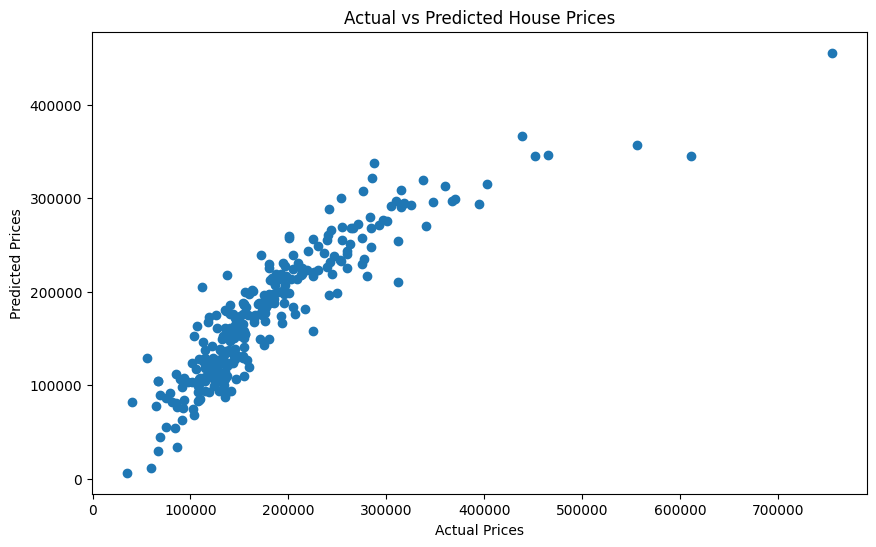

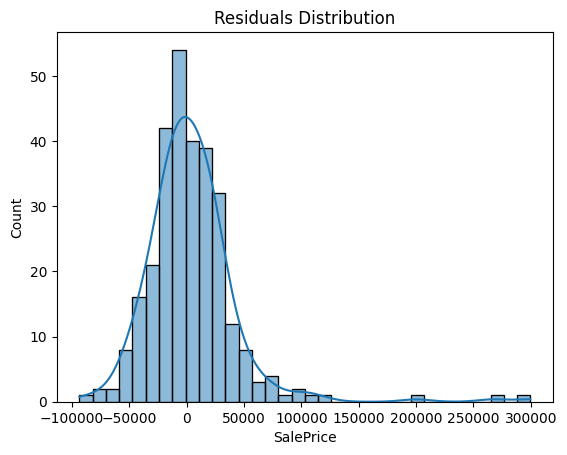

In [20]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Visualize residuals (errors)
sns.histplot(y_test - y_pred, kde=True)
plt.title('Residuals Distribution')
plt.show()
